In [1]:
import numpy as np
from scipy import integrate as intg 
from scipy import optimize as opt
from matplotlib import pyplot as plt 
import time 
import Eilenberger as eil

plt.rcParams['font.size']=14
plt.rcParams['text.usetex']=True

In [6]:
ntheta = 20
cutoff = 30.*eil.BCS_ratio
nw = 200

fine_nw = 200
fine_cutoff = 2.*eil.BCS_ratio

ntemps = 10
temps = np.linspace(0.3,1.2,ntemps)

gaps = np.zeros((ntemps),dtype=complex)
times = np.zeros_like(gaps,dtype=float)
grs = []

sim = eil.Eilenberger(nw,ntheta,cutoff,fine_grid=(fine_nw,fine_cutoff))
sim.verbose = True
sim.set_gamma_imp(0.03)
sim.set_Dynes_eta(0.03)
sim.set_Q0(0.)
sim.set_Tc(1.)
sim.set_BCS_coupling(sim.calc_BCS_coupling() )

sim.scba_step = 0.15
sim.scba_err = 1.e-4

for i in range(ntemps):
    print(str(i))
    sim.set_temperature(temps[i])
    t0 = time.time()
    if i > 0:
        gap, gr  = sim.calc_eq(grs[i-1])
        print(gap)
        gaps[i] = gap
        grs.append(gr)
    else:
        gap, gr = sim.calc_eq()
        print(gap)
        gaps[i] = gap
        grs.append(gr)
    t1 = time.time()
    times[i] = t1-t0


0
Loop: 0, err: 0.005399412227881872, gap: (0.11314242848292266-0j)
Loop: 1, err: 0.005715578545042076, gap: (0.13796882182977063-0j)
Loop: 2, err: 0.005759741662635074, gap: (0.15805916084090563-0j)
Loop: 3, err: 0.006025741824325729, gap: (0.1827558505840242-0j)
Loop: 4, err: 0.0061934909159894755, gap: (0.20624561424858526-0j)
Loop: 5, err: 0.006425825919474998, gap: (0.2314917096270909-0j)
Loop: 6, err: 0.0066754625802420905, gap: (0.2579235869673263-0j)
Loop: 7, err: 0.006870203200961009, gap: (0.28386953542614296-0j)
Loop: 8, err: 0.007180263635539513, gap: (0.31292027413875767-0j)
Loop: 9, err: 0.007409349324339491, gap: (0.34114259801812213-0j)
Loop: 10, err: 0.007586203915882298, gap: (0.3690722683466732-0j)
Loop: 11, err: 0.007879175218366943, gap: (0.4001224555090778-0j)
Loop: 12, err: 0.00811652026870637, gap: (0.4309176762114797-0j)
Loop: 13, err: 0.008314406815640198, gap: (0.4615969085368466-0j)
Loop: 14, err: 0.008538660451257797, gap: (0.4934754109283054-0j)
Loop: 15, 

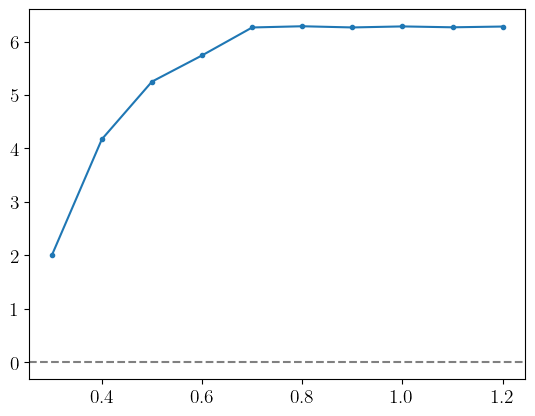

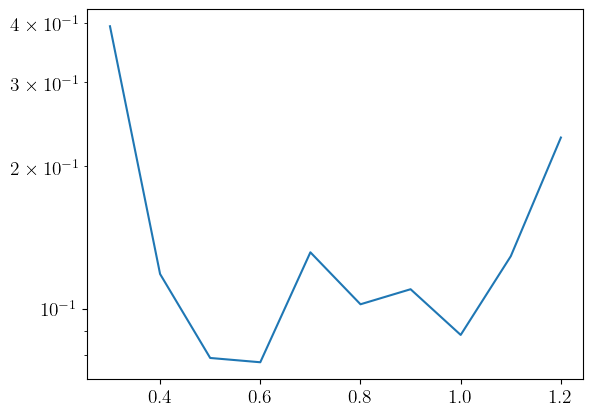

In [7]:
plt.plot(temps,np.real(gaps[:]),marker='.')
plt.axhline(0.,color='gray',linestyle='dashed')
plt.show()
plt.plot(temps,times[:])
plt.yscale('log')
plt.show()


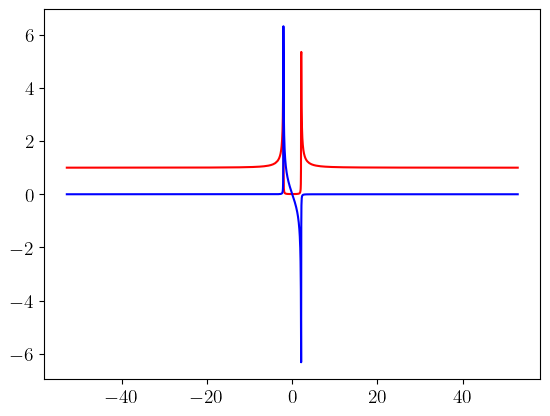

In [8]:
plt.plot(sim.w_arr,np.real(grs[0][0,0,:,0]),'red')
plt.plot(sim.w_arr,np.imag(grs[0][0,0,:,0]),'blue')
plt.show()